<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/univeral_tensor_network_paper__reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 290 (delta 163), reused 127 (delta 52), pack-reused 0
Receiving objects: 100% (290/290), 511.00 KiB | 9.46 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su
from tqdm.auto import tqdm


np.random.seed(216)

plt.rcParams.update({'font.size': 16, 
                     "figure.facecolor": 'white', 
                     "axes.facecolor": 'white', 
                     "savefig.facecolor": 'white', 
                     'savefig.edgecolor' : 'white', 
                     'figure.edgecolor' : 'white'})

# Spin $\frac{1}{2}$ Lattice Simulations

In [3]:
# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

## Infinite Chain Tensor-Network Simple-Update Simulation

In [4]:
# The Tensor Network structure matrix
chain_structure_matrix = np.array([[1, 2],
                                   [1, 2]])

# Simple-Update parameters
d_max_chain = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60]
error = 1e-6
max_iterations = 200
chain_energy = []
j_ij_chain = [1., 1.]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_chain:
    chain = TensorNetwork(structure_matrix=chain_structure_matrix, virtual_size=2)
    chain_su = su.SimpleUpdate(tensor_network=chain, 
                               dts=dts, 
                               j_ij=j_ij_chain, 
                               h_k=h_k, 
                               s_i=s_i, 
                               s_j=s_j, 
                               s_k=s_k, 
                               d_max=d_max, 
                               max_iterations=max_iterations, 
                               convergence_error=error, 
                               log_energy=True,
                               print_process=True)
    chain_su.run()
    energy = chain_su.energy_per_site()
    print(f'| D max: {d_max} | Chain Energy: {energy}\n')
    chain_energy.append(energy)

| dt 0.100000 |    20/  200 iteration | averaged error 0.0038838129 | energy per-site -0.399527 | time 0.095 sec
| dt 0.100000 |    40/  200 iteration | averaged error 0.0002942519 | energy per-site -0.419561 | time 0.081 sec
| dt 0.100000 |    60/  200 iteration | averaged error 0.0000237823 | energy per-site -0.420585 | time 0.073 sec
| dt 0.100000 |    80/  200 iteration | averaged error 0.0000040937 | energy per-site -0.420644 | time 0.11 sec
| dt 0.100000 |   100/  200 iteration | averaged error 0.0000012402 | energy per-site -0.420647 | time 0.083 sec
| dt 0.100000 |   120/  200 iteration | averaged error 0.0000003728 | energy per-site -0.420647 | time 0.074 sec
| dt 0.010000 |    20/  200 iteration | averaged error 0.0000925437 | energy per-site -0.427011 | time 0.085 sec
| dt 0.010000 |    40/  200 iteration | averaged error 0.0000819590 | energy per-site -0.427048 | time 0.073 sec
| dt 0.010000 |    60/  200 iteration | averaged error 0.0000725056 | energy per-site -0.427077 |

## Infinite PEPS Tensor-Network Simple-Update Simulation

In [5]:
# The Tensor Network structure matrix
peps_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 3, 4, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 3, 4,],
                                  [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_peps = [2, 3, 4, 5, 6]
error = 1e-6
max_iterations = 200
peps_energy = []
j_ij_peps = [1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_peps:
    peps = TensorNetwork(structure_matrix=peps_structure_matrix, virtual_size=2)
    peps_su = su.SimpleUpdate(tensor_network=peps, 
                              dts=dts, 
                              j_ij=j_ij_peps, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    peps_su.run()
    energy = peps_su.energy_per_site()
    print(f'| D max: {d_max} | PEPS Energy: {energy}\n')
    peps_energy.append(energy)

| dt 0.100000 |    20/  200 iteration | averaged error 0.0054299608 | energy per-site -0.415526 | time 0.35 sec
| dt 0.100000 |    40/  200 iteration | averaged error 0.0034555672 | energy per-site -0.526756 | time 0.34 sec
| dt 0.100000 |    60/  200 iteration | averaged error 0.0004045639 | energy per-site -0.55639 | time 0.35 sec
| dt 0.100000 |    80/  200 iteration | averaged error 0.0000861118 | energy per-site -0.560413 | time 0.34 sec
| dt 0.100000 |   100/  200 iteration | averaged error 0.0000161836 | energy per-site -0.561082 | time 0.33 sec
| dt 0.100000 |   120/  200 iteration | averaged error 0.0000028708 | energy per-site -0.561197 | time 0.36 sec
| dt 0.100000 |   140/  200 iteration | averaged error 0.0000005008 | energy per-site -0.561217 | time 0.34 sec
| dt 0.010000 |    20/  200 iteration | averaged error 0.0000947163 | energy per-site -0.574056 | time 0.36 sec
| dt 0.010000 |    40/  200 iteration | averaged error 0.0000488450 | energy per-site -0.574119 | time 0.

## Infinite Star Tensor-Network Simple-Update Simulation

In [6]:
# The Tensor Network structure matrix
star_structure_matrix = np.array([[1, 2, 3, 0, 0, 0, 0, 0, 0],
                                  [1, 0, 0, 2, 3, 0, 0, 0, 0],
                                  [0, 1, 0, 2, 0, 3, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 2, 3, 0],
                                  [0, 0, 0, 0, 1, 0, 2, 0, 3],
                                  [0, 0, 1, 0, 0, 0, 0, 2, 3]])
# Simple-Update parameters
d_max_star = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
error = 1e-5
max_iterations = 100
star_energy = []
j_ij_star = [1, 1, 0.05, 1, 0.05, 0.05, 1, 1, 1]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_star:
    star = TensorNetwork(structure_matrix=star_structure_matrix, virtual_size=2)
    star_su = su.SimpleUpdate(tensor_network=star, 
                              dts=dts, 
                              j_ij=j_ij_star, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    star_su.run()
    energy = star_su.energy_per_site()
    print(f'| D max: {d_max} | Star Energy: {energy}\n')
    star_energy.append(energy)

| dt 0.100000 |    20/  100 iteration | averaged error 0.0029747739 | energy per-site -0.311062 | time 0.37 sec
| dt 0.100000 |    40/  100 iteration | averaged error 0.0008120942 | energy per-site -0.314418 | time 0.34 sec
| dt 0.100000 |    60/  100 iteration | averaged error 0.0007890975 | energy per-site -0.31487 | time 0.36 sec
| dt 0.100000 |    80/  100 iteration | averaged error 0.0009537159 | energy per-site -0.315383 | time 0.35 sec
| dt 0.010000 |    20/  100 iteration | averaged error 0.0002461590 | energy per-site -0.318178 | time 0.36 sec
| dt 0.010000 |    40/  100 iteration | averaged error 0.0002494783 | energy per-site -0.318589 | time 0.34 sec
| dt 0.010000 |    60/  100 iteration | averaged error 0.0002560544 | energy per-site -0.319049 | time 0.35 sec
| dt 0.010000 |    80/  100 iteration | averaged error 0.0002649114 | energy per-site -0.319576 | time 0.35 sec
| dt 0.001000 |    20/  100 iteration | averaged error 0.0000285457 | energy per-site -0.320349 | time 0.

# Infinite Cube Tensor-Network Simple-Update Simulation

In [25]:
# The Tensor Network structure matrix
cube_structure_matrix = np.array([[1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 0, 0, 5, 6]])

# Simple-Update parameters
d_max_cube = [2, 3]
error = 1e-4
max_iterations = 50
cube_energy = []
j_ij_cube = [1.] * 24
dts = [0.1, 0.01, 0.001, 0.0001]
h_k = 0.


# Run
for d_max in d_max_cube:
    cube = TensorNetwork(structure_matrix=cube_structure_matrix, virtual_size=2)
    cube_su = su.SimpleUpdate(tensor_network=cube, 
                              dts=dts, 
                              j_ij=j_ij_cube, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    cube_su.run()
    energy = cube_su.energy_per_site()
    print(f'| D max: {d_max} | Cube Energy: {energy}\n')
    cube_energy.append(energy)

| dt 0.100000 |    20/   50 iteration | averaged error 0.0057959249 | energy per-site -0.798737 | time  1.8 sec
| dt 0.100000 |    40/   50 iteration | averaged error 0.0001634159 | energy per-site -0.845641 | time  1.7 sec
| dt 0.010000 |    20/   50 iteration | averaged error 0.0001654421 | energy per-site -0.876864 | time  1.7 sec
| dt 0.010000 |    40/   50 iteration | averaged error 0.0000828296 | energy per-site -0.877015 | time  1.7 sec
| dt 0.001000 |    20/   50 iteration | averaged error 0.0000378192 | energy per-site -0.87982 | time  1.7 sec
| dt 0.000100 |    20/   50 iteration | averaged error 0.0000302857 | energy per-site -0.880097 | time  1.7 sec
| D max: 2 | Cube Energy: -0.8800969648449322

| dt 0.100000 |    20/   50 iteration | averaged error 0.0001457782 | energy per-site -0.853482 | time 1.2e+02 sec
| dt 0.100000 |    40/   50 iteration | averaged error 0.0000001169 | energy per-site -0.854796 | time 1.2e+02 sec
| dt 0.010000 |    20/   50 iteration | averaged err

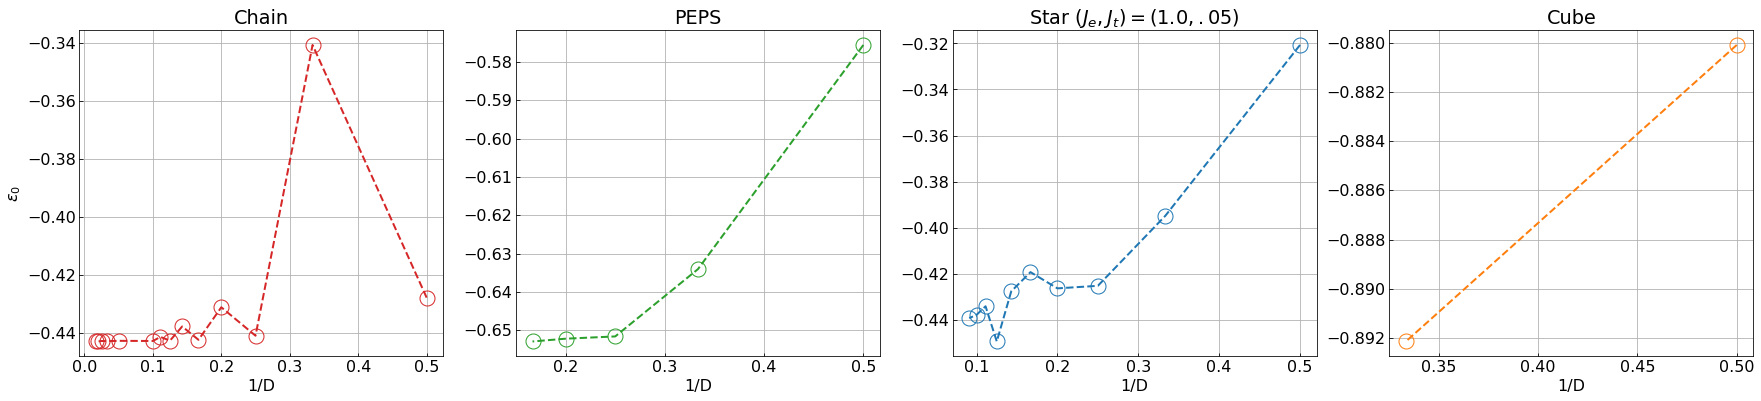

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(30, 6))
axes[0].plot(1 / np.array(d_max_chain), chain_energy, '--o', color='tab:red', markerfacecolor='none', linewidth=2, markersize=15)
axes[0].set_xlabel(r'1/D')
axes[0].set_ylabel(r'$\epsilon_0$')
axes[0].set_title('Chain')
axes[0].tick_params(direction='in', axis='both')
axes[0].grid()

axes[1].plot(1 / np.array(d_max_peps), peps_energy, '--o', color='tab:green', markerfacecolor='none', linewidth=2, markersize=15)
axes[1].set_xlabel(r'1/D')
#axes[1].set_ylabel(r'$\epsilon_0$')
axes[1].set_title('PEPS')
axes[1].tick_params(direction='in', axis='both')
axes[1].grid()

axes[2].plot(1 / np.array(d_max_star), star_energy, '--o', color='tab:blue', markerfacecolor='none', linewidth=2, markersize=15)
axes[2].set_xlabel(r'1/D')
#axes[2].set_ylabel(r'$\epsilon_0$')
axes[2].set_title(r'Star $\left(J_e,J_t\right)=\left(1.0,.05\right)$')
axes[2].tick_params(direction='in', axis='both')
axes[2].grid()

axes[3].plot(1 / np.array(d_max_cube), cube_energy, '--o', color='tab:orange', markerfacecolor='none', linewidth=2, markersize=15)
axes[3].set_xlabel(r'1/D')
#axes[3].set_ylabel(r'$\epsilon_0$')
axes[3].set_title('Cube')
axes[3].tick_params(direction='in', axis='both')
axes[3].grid()


## Quantum Ising model in transverse magnetic field on $2d$ square lattice

In [24]:
# The Tensor Network structure matrix
ising_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                   [1, 2, 0, 0, 3, 4, 0, 0],
                                   [0, 0, 1, 2, 0, 0, 3, 4,],
                                   [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_ising = [2]
error = 1e-6
max_iterations = 200
ising_energy = []
ising_z_magnetizaton = []
ising_x_magnetizaton = []

j_ij_ising = [-1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = -np.linspace(0, 4, 60)

s_i = [pauli_z]
s_j = [pauli_z]
s_k = [pauli_x]


# Run
for d_max in d_max_ising:
    for h in tqdm(h_k):
        ising = TensorNetwork(structure_matrix=ising_structure_matrix, virtual_size=2)
        ising_su = su.SimpleUpdate(tensor_network=ising, 
                                  dts=dts, 
                                  j_ij=j_ij_ising, 
                                  h_k=h, 
                                  s_i=s_i, 
                                  s_j=s_j, 
                                  s_k=s_k, 
                                  d_max=d_max, 
                                  max_iterations=max_iterations, 
                                  convergence_error=error, 
                                  log_energy=False,
                                  print_process=False)
        ising_su.run()
        energy = ising_su.energy_per_site()
        z_magnetization = ising_su.expectation_per_site(pauli_z)
        x_magnetization = ising_su.expectation_per_site(pauli_x)
        print('| D max: {:3d} | h: {:3.10f} | Energy: {:3.10f} | Mz: {:3.10f} | Mx: {:3.10f} |'
        .format(d_max, h, energy, z_magnetization, x_magnetization))
        ising_energy.append(energy)
        ising_z_magnetizaton.append(z_magnetization)
        ising_x_magnetizaton.append(x_magnetization)


| D max:   2 | h: -0.0000000000 | Energy: -2.0000000000 | Mz: 1.0000000000 | Mx: 0.0000000090 |
| D max:   2 | h: -0.0677966102 | Energy: -2.0005745613 | Mz: -0.9998563340 | Mx: 0.0169499902 |
| D max:   2 | h: -0.1355932203 | Energy: -2.0022984098 | Mz: -0.9994249884 | Mx: 0.0339049469 |
| D max:   2 | h: -0.2033898305 | Energy: -2.0051720403 | Mz: -0.9987049166 | Mx: 0.0508698690 |
| D max:   2 | h: -0.2711864407 | Energy: -2.0091962828 | Mz: -0.9976944259 | Mx: 0.0678489093 |
| D max:   2 | h: -0.3389830508 | Energy: -2.0143722930 | Mz: 0.9963910106 | Mx: 0.0848480131 |
| D max:   2 | h: -0.4067796610 | Energy: -2.0207015678 | Mz: 0.9947915057 | Mx: 0.1018718221 |
| D max:   2 | h: -0.4745762712 | Energy: -2.0281859415 | Mz: 0.9928919708 | Mx: 0.1189254028 |
| D max:   2 | h: -0.5423728814 | Energy: -2.0368275915 | Mz: -0.9906876793 | Mx: 0.1360138868 |
| D max:   2 | h: -0.6101694915 | Energy: -2.0466290429 | Mz: -0.9881730808 | Mx: 0.1531424914 |
| D max:   2 | h: -0.6779661017 | 

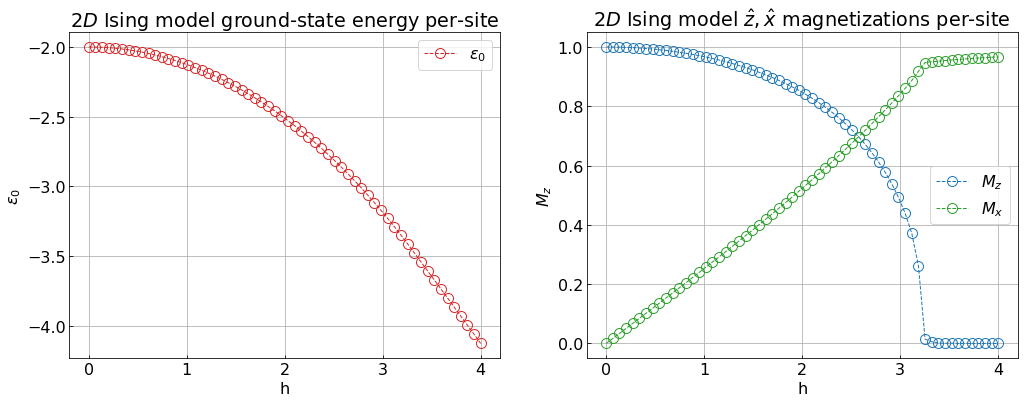

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax[0].plot(-h_k, ising_energy, '--o', label=r'$\epsilon_0$', color='tab:red', markerfacecolor='none', linewidth=1, markersize=10)
ax[0].set_xlabel(r'h')
ax[0].set_ylabel(r'$\epsilon_0$')
ax[0].set_title('$2D$ Ising model ground-state energy per-site')
ax[0].tick_params(direction='in', axis='both')
ax[0].grid()
ax[0].legend()

ax[1].plot(-h_k, np.abs(np.array(ising_z_magnetizaton)), '--o', label=r'$M_z$', color='tab:blue', markerfacecolor='none', linewidth=1, markersize=10)
ax[1].plot(-h_k, ising_x_magnetizaton, '--o', label=r'$M_x$', color='tab:green', markerfacecolor='none', linewidth=1, markersize=10)
ax[1].set_xlabel(r'h')
ax[1].set_ylabel(r'$M_z$')
ax[1].set_title(r'$2D$ Ising model $\hat{z}, \hat{x}$ magnetizations per-site')
ax[1].tick_params(direction='in', axis='both')
ax[1].grid()
ax[1].legend()